# **Car Body Damage Detection**
### -Detect scratch, dent, repaint etc. on car body

In [0]:
# Using segmentation_models for image segmentation task, https://github.com/qubvel/segmentation_models
! pip install segmentation-models

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import warnings
warnings.filterwarnings("ignore")
# for TensorBoard

import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
import segmentation_models
print(segmentation_models.__version__)

import segmentation_models as sm

Using TensorFlow backend.


Segmentation Models: using `keras` framework.
1.0.1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#https://www.tensorflow.org/guide/data#decoding_image_data_and_resizing_it

def parse_image(filename, resize = True):
  '''
  Reads an image from a file,
  decodes it into a dense tensor,
  and resizes it to a fixed shape
  '''
  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  if resize:
    image = tf.image.resize(image, [256, 256])
  return image

In [0]:
def display1(display_list):
  plt.figure(figsize=(8, 8))

  title = ['Input Image', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [0]:
# Metrics
# For image segmentation
# COMPETITION METRIC
# https://www.kaggle.com/xhlulu/severstal-simple-keras-u-net-boilerplate
def dice_coef(y_true, y_pred, smooth=K.epsilon()):
    '''
    This function returns dice coefficient of similarity between y_true and y_pred
    Dice coefficient is also referred to as F1_score, but we will use this name for image segmentation models
    For example, 
    let an instance on y_true and y_pred be [[1,1],[0,1]] and [[1,0],[0,1]]
    this metric first converts the above into [1,1,0,1] abd [1,0,0,1],
    then intersection is calculated as 1*1 + 1*0 + 0*1 + 1*1 = 2 and sum(y_true)+sum(y_pred)= 3+2 = 5
    this returns the value (2.* 2 + 10e-7)/(3 + 2 + 10e-7) ~ 0.8    
    '''
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    
dependencies = {'dice_coef':dice_coef,
    'dice_loss':sm.losses.dice_loss }

In [0]:
# Load data
import pathlib
data_dir = pathlib.Path('/content/drive/My Drive/Colab Notebooks/CS2/references/new/v_images/images') 
data_dir
file_path = tf.data.Dataset.list_files(str(data_dir/'*'))

## Model

### Final function_1

In [0]:
# get Predictions
def predict(file_path):
  '''
  Takes image path and returns input image and Predicted mask
  '''
  image = parse_image([i for i in file_path][1], resize = True)
  test1 = tf.data.Dataset.from_tensor_slices([image])
  # Loading best model
  model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/CS2/references/car_damage_final_unet++', custom_objects=dependencies)
  for image in test1.take(1):
    pred_mask = model.predict(image[tf.newaxis, ...])[0]
  return image, pred_mask

### Final function_2

In [0]:
def show_predictions(file_path):
  '''
  Takes image path and predicts mask and plots the Input, Predicted images
  '''
  image, pred_mask = predict(file_path)
  display1([image, pred_mask])

### Predictions

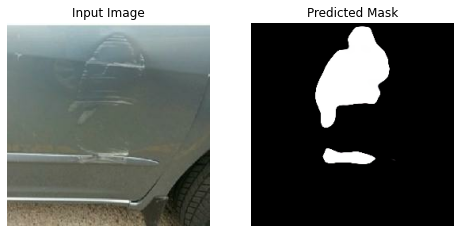

In [11]:
show_predictions(file_path)

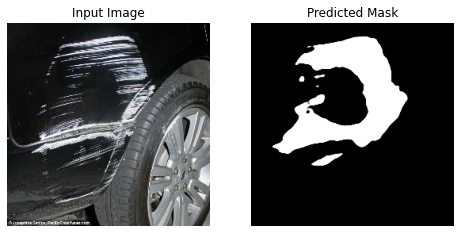

In [17]:
show_predictions(file_path)

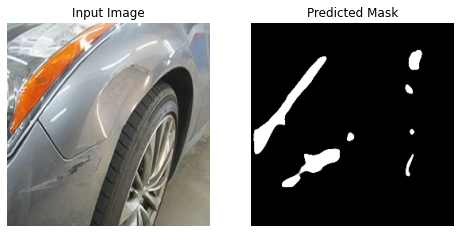

In [23]:
show_predictions(file_path)

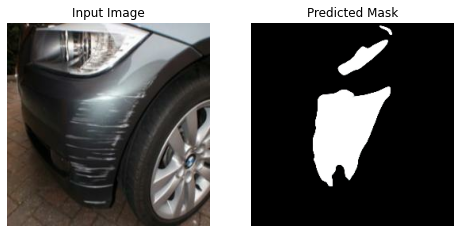

In [18]:
show_predictions(file_path)